<a href="https://colab.research.google.com/github/reyhannazera16/DesaCerdas/blob/main/Klasifikasi_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install panda
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#file csv
train_path = r'drive/My Drive/data_training.csv'
test_path = r'drive/My Drive/data_testing.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)

print(data_train.columns.tolist())

['Internet', 'pengembangan', 'penataan', 'pembangunan', 'komunitas', 'fasilitas', 'Kelas']


In [ ]:
label_train = data_train['Kelas'].to_numpy()

fitur_train = data_train[['Internet','pengembangan', 'penataan', 'pembangunan', 'komunitas' , 'fasilitas']]
print(fitur_train)

     Internet  pengembangan  penataan  pembangunan  komunitas  fasilitas
0         0.0             2         3            2          3          3
1         1.0             2         3            3          2          5
2         0.0             3         4            3          3          3
3         0.0             2         2            2          2          2
4         0.0             3         3            3          3          3
..        ...           ...       ...          ...        ...        ...
282       0.0             1         1            2          2          1
283       0.0             3         3            3          3          3
284       0.0             2         3            2          3          3
285       0.0             2         3            1          1          3
286       0.0             2         2            2          2          2

[287 rows x 6 columns]


In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(fitur_train, label_train, random_state=0)

In [ ]:
from sklearn.impute import SimpleImputer

# Mencari nilai rata-rata pada kolom-kolom yang mengandung nilai NaN
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tn + tp) / (tn+fp+fn+tp)
print(accuracy)

0.9166666666666666


Test pada data Testing

In [ ]:
fitur_test = data_test[['Internet','pengembangan', 'penataan', 'pembangunan', 'komunitas' , 'fasilitas']]



y_pred_test = svc.predict(fitur_test)
print(y_pred_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


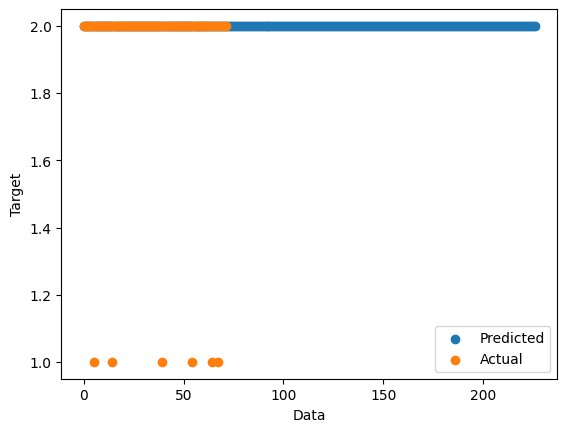

In [ ]:
import matplotlib.pyplot as plt

# Buat scatter plot hasil prediksi terhadap data test
plt.scatter(range(len(y_pred_test)), y_pred_test, label='Predicted')
plt.scatter(range(len(y_test)), y_test, label='Actual')

# Atur label pada sumbu x dan y
plt.xlabel('Data')
plt.ylabel('Target')

# Tampilkan legenda pada grafik
plt.legend()

# Tampilkan grafik
plt.show()
